### Metro Interstate Traffic Volume
`Dataset`: Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.<br>
`Available from`: https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume <br>

Variable Information: <br>
1. `holiday`: US National holidays plus regional holiday, Minnesota State Fair
2. `temp`: Average temp in kelvin
3. `rain_1h`: Amount in mm of rain that occurred in the hour
4. `snow_1h`: Amount in mm of snow that occurred in the hour
5. `clouds_all`: Percentage of cloud cover
6. `weather_main`: Short textual description of the current weather
7. `weather_description`: Longer textual description of the current weather
8. `date_time`: Hour of the data collected in local CST time
9. `traffic_volume`: Hourly I-94 ATR 301 reported westbound traffic volume

### Objective
- The goal is to find and determine some indicators of heavy traffic on I-94.

### Two types of data visualization:

- `Exploratory` data visualization: we build graphs for ourselves to explore data and find patterns.
- `Explanatory` data visualization: we build graphs for others to communicate and explain the patterns we've found through exploring data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None # ignore warning


%matplotlib inline

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
df['holiday'] = df['holiday'].replace(np.nan, None)
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <BarContainer object of 10 artists>)

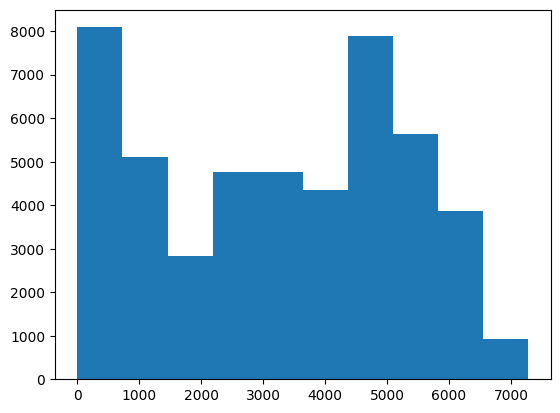

In [6]:
# Plot a histogram to examine the distribution of the traffic_volume column
plt.hist(df['traffic_volume'])

In [7]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

**Oberservations**:
- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

1. Transform the date_time column to datetime by using the function `pd.to_datetime()`.
2. Use `Series.dt.hour` property to get the hour of every instance of the `date_time` column and do the following:
- Isolate the daytime data.
- Isolate the nighttime data.

In [8]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [9]:
daytime = df[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]
nighttime = df[(df['date_time'].dt.hour >= 19)|(df['date_time'].dt.hour < 7)]

In [10]:
print(daytime.shape)
print(nighttime.shape)

(23877, 9)
(24327, 9)


#### Plot the histograms of `traffic_volume` for both day and night. <br>
Organize the two histograms side-by-side on a grid chart.

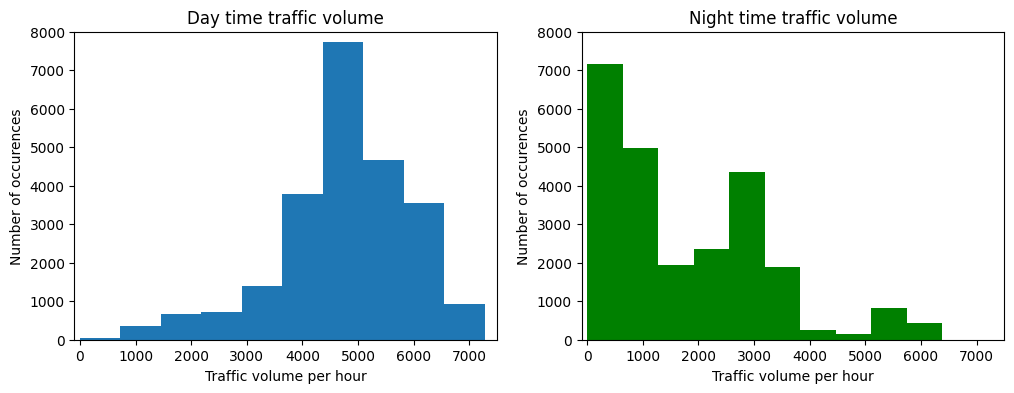

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.title('Day time traffic volume')
plt.xlabel('Traffic volume per hour')
plt.ylabel('Number of occurences')
plt.ylim([0, 8000])
plt.xlim([-100, 7500])

plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'], color='green')
plt.title('Night time traffic volume')
plt.xlabel('Traffic volume per hour')
plt.ylabel('Number of occurences')
plt.ylim([0, 8000])
plt.xlim([-100, 7500])

plt.show()

From the above, the traffic volume distribution is skewed to the left during the day time, and to the right during the night. <br>That means we see more volume during the day, and less during the night, as expected and in line with our prior observations.

Now, we can check some statistics:

In [12]:
daytime["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
nighttime["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

**Observations**:<br>
We can see that 75% of the time at night, the traffic volume is 2819 or lower, which is below the 25% occurrence range during the day. <br> Based on these data, we can say that nighttime data can be ignored in this analysis because we cannot quantify nighttime traffic volume. <br> Moving forward, we will only focus on daytime data.

In [14]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month')['traffic_volume'].mean().round(3)
by_month

month
1     4495.614
2     4711.198
3     4889.410
4     4906.894
5     4911.122
6     4898.020
7     4595.036
8     4928.302
9     4870.783
10    4921.235
11    4704.094
12    4374.835
Name: traffic_volume, dtype: float64

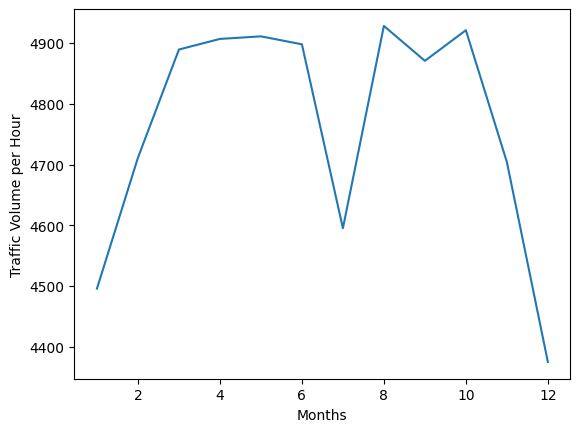

In [15]:
# Generate a line plot to visualize how the traffic volume changed each month on average.
plt.plot(by_month)
plt.xlabel("Months")
plt.ylabel("Traffic Volume per Hour")
plt.show()

We can observe that the lowest level is in December, then gradually increasing until it hits a high in March. It stays fairly high and constant from March until June, then drops significantly in July. In August we observe another increase, and it stays fairly constant until November.

These observations point to the conclusion that the traffic volume tends to be higher during the warmer months, with the exception of July. We will dig deeper to see why July is an exception.

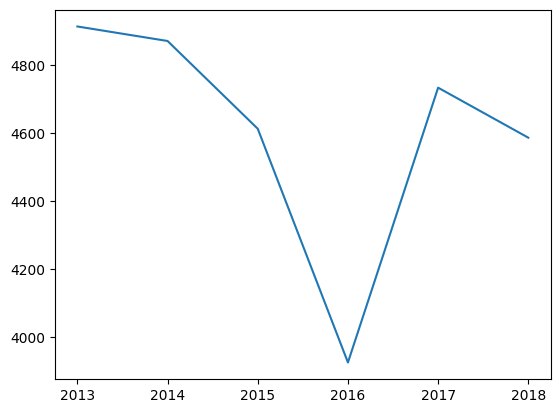

In [16]:
daytime["year"] = daytime["date_time"].dt.year
july_only = daytime[daytime["month"] == 7]
july_avg = july_only.groupby("year")["traffic_volume"].mean()
plt.plot(july_avg)
plt.show()

We can see `traffic volumes` in July have a significant drop in 2016, which could be the reason why we saw the drop in volume by months plot. We can investigate further why this happened, but most likely it is due to some construction or lane closure.

Now, we can move on to days of the week:

In [17]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek')['traffic_volume'].mean().round(3)
by_dayofweek # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551
1    5189.005
2    5284.454
3    5311.304
4    5291.601
5    3927.250
6    3436.542
Name: traffic_volume, dtype: float64

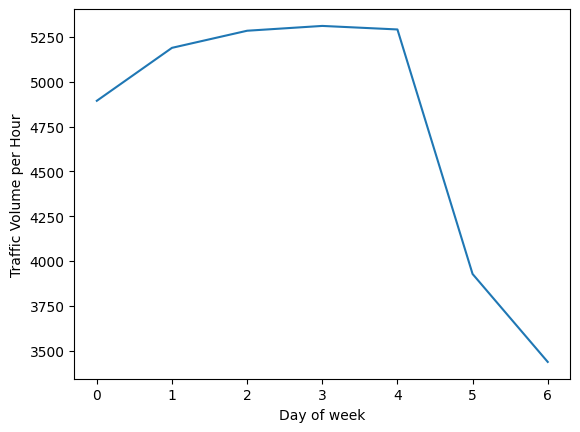

In [18]:
# Generate a line plot to visualize how the traffic volume changed each day of the week on average.
plt.plot(by_dayofweek)
plt.xlabel("Day of week")
plt.ylabel("Traffic Volume per Hour")
plt.show()

We can see that the traffic volume decreases by up to 30% during the weekend, with the lowest day being Sunday.

Finally, we will move to hours of the day. Since wekends will reduce the average values, as we've seen above, we will look at the weekend averages separately.

First step is to split the data based on the day type - `Weekdays` or `Weekend`

In [19]:
daytime['hour'] = daytime['date_time'].dt.hour
weekdays = daytime[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_weekday = weekdays.groupby('hour')['traffic_volume'].mean()
by_hour_weekend = weekend.groupby('hour')['traffic_volume'].mean()

print(by_hour_weekday)
print('-'*20)
print(by_hour_weekend)

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
--------------------
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


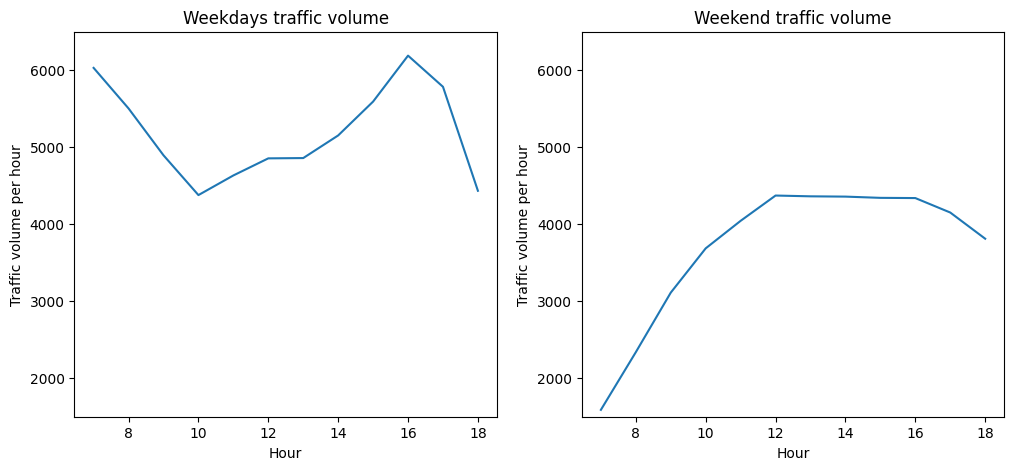

In [20]:
# Plot two line plots on a grid chart to visualize how the 
# traffic volume changes by time of the day.

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(by_hour_weekday)
plt.title('Weekdays traffic volume')
plt.xlabel('Hour')
plt.ylabel('Traffic volume per hour')
plt.ylim([1500, 6500])

plt.subplot(1,2,2)
plt.plot(by_hour_weekend)
plt.title('Weekend traffic volume')
plt.xlabel('Hour')
plt.ylabel('Traffic volume per hour')
plt.ylim([1500, 6500])

plt.show()

- **Weekdays** - peak hours tend to be at 7 and 16h, which corresponds with the times when majority of people go to and from work.

- **Weekends** - an increase in traffic as the days go on, starting very low in the morning, then gradually increasing towards the noon. In general, highest traffic volumes during the weekend is equal to the lowest traffic volumes during the weekdays.

### Next: Weather type
Find the correlation between `traffic_volume` and `weather_main` columns.

In [21]:
def gen_barh_plot(df, col_x, col_y, title, xlabel=None, color=None, xv_line=None):
    plt.barh(df[col_x], df[col_y], height=0.4, color=color)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel('', fontsize=14)
    plt.tick_params(left=False)
    if xv_line:
        plt.axvline(x=xv_line, color='dimgrey', linewidth=0.2)
    sns.despine(left=True)

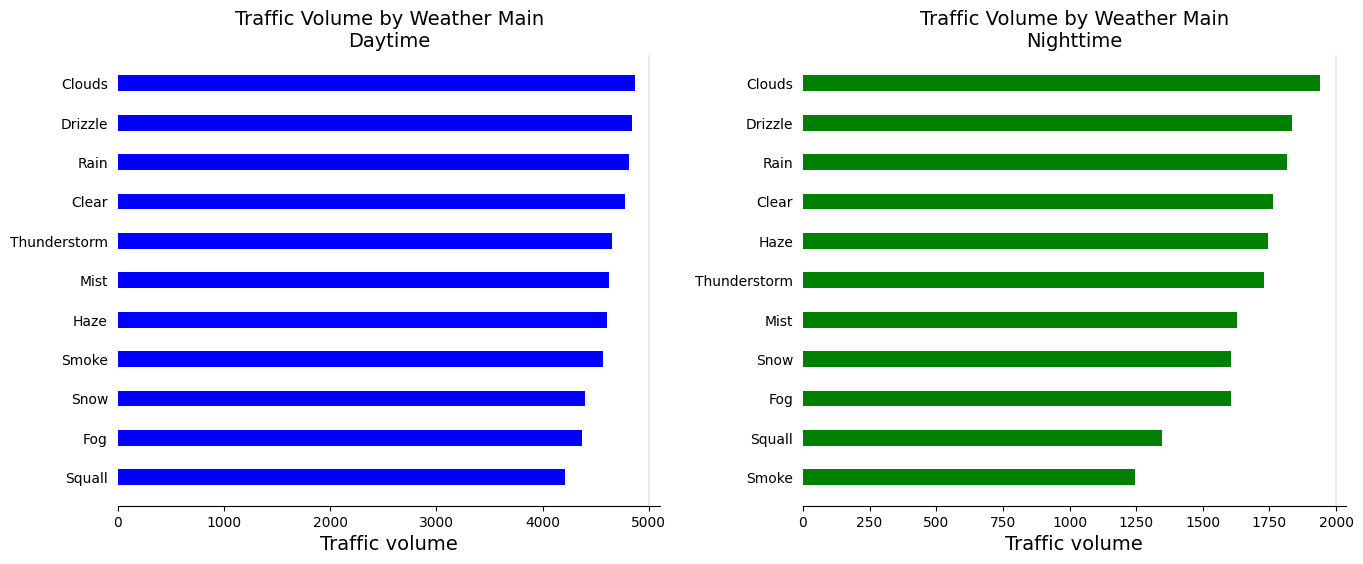

In [22]:
weather_main_day = daytime.groupby('weather_main')['traffic_volume'].mean().sort_values().reset_index()
weather_main_night = nighttime.groupby('weather_main')['traffic_volume'].mean().sort_values().reset_index()

dfs = [weather_main_day, weather_main_night]
titles = ['Traffic Volume by Weather Main\nDaytime', 'Traffic Volume by Weather Main\nNighttime']
xv_lines = [5000, 2000]
colors = ['blue', 'green']

plt.figure(figsize=(14, 6))

for i in range(2):
    plt.subplot(1, 2, i+1)
    gen_barh_plot(dfs[i], 'weather_main', 'traffic_volume', titles[i], xlabel='Traffic volume',
                  color=colors[i], xv_line=xv_lines[i])
plt.tight_layout(pad=2)

In the chart for the daytime data, there are no weather types with traffic volumes exceeding 5,000 vehicles. Similarly, in the night data map, the traffic volume does not exceed 2,000 vehicles. This makes finding heavy traffic indicators more difficult.

Next, we will group by `Weather_description`, which has a more granular classification of weather.

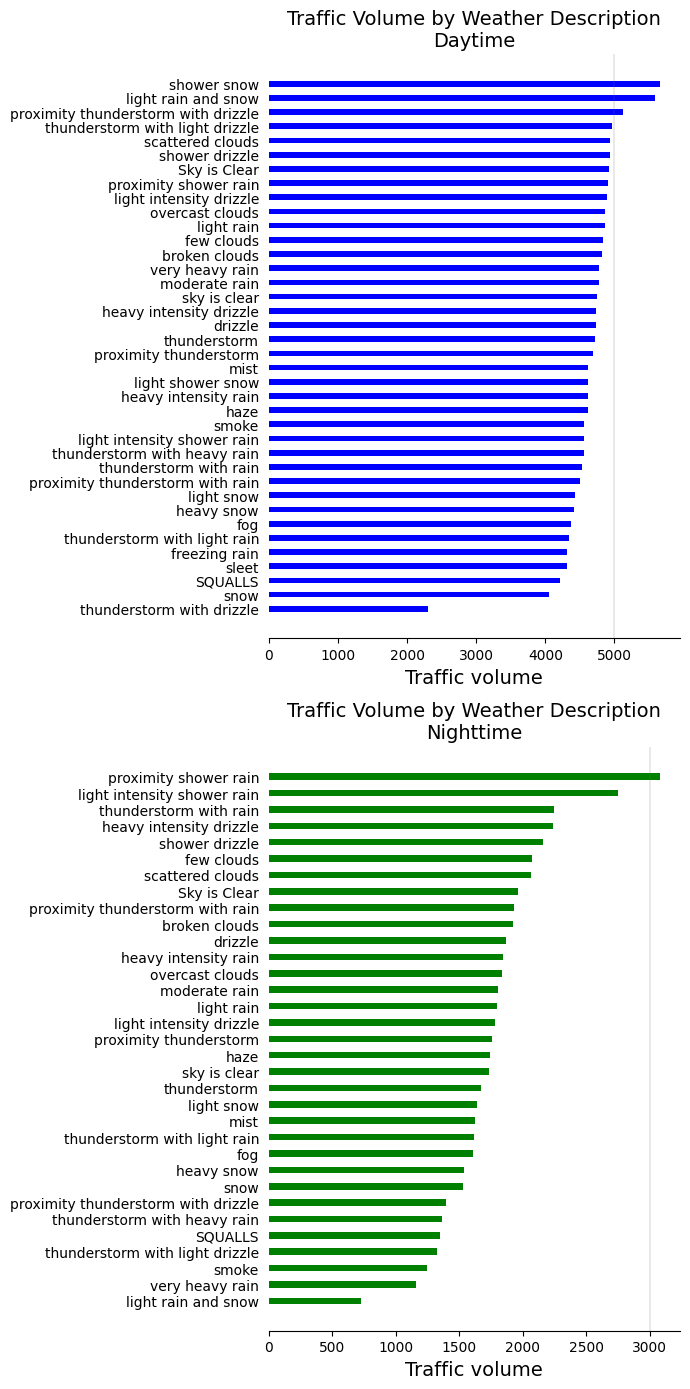

In [23]:
weather_description_day = daytime.groupby('weather_description')['traffic_volume'].mean().sort_values().reset_index()
weather_description_night = nighttime.groupby('weather_description')['traffic_volume'].mean().sort_values().reset_index()


dfs = [weather_description_day, weather_description_night]
titles = ['Traffic Volume by Weather Description\nDaytime', 'Traffic Volume by Weather Description\nNighttime']
xv_lines = [5000, 3000]
colors = ['blue', 'green']

plt.figure(figsize=(7, 14))

for i in range(2):
    plt.subplot(2, 1, i+1)
    gen_barh_plot(dfs[i], 'weather_description', 'traffic_volume', titles[i], xlabel='Traffic volume',
                  color=colors[i], xv_line=xv_lines[i])
plt.tight_layout()

**daytime** - there are 3 weather types where traffic volume exceeds 5,000 cars: **Shower snow**, **Light rain and snow** and **Proximity thunderstorm with drizzle**.

- It's unclear why these types of weather have the highest average flow values; these are bad, but not the worst. However, very severe weather conditions are often forecast well in advance, so people may try to avoid traveling on those days.

**nighttime** - there are 2 weather types where traffic volume exceeds 2,500 cars: **Proximity shower rain** and **Light intensity shower rain**.

- Similar to daytime, these are severe weather conditions, but not that bad. However, they are sufficient for people to decide to slow down to avoid accidents, resulting in increased traffic intensity.

### Conclusion
Throughout this project, we have analyzed the traffic dataset in order to determine indicators for the heavy traffic.

1. Warmer months lead to heavier traffic, with July being an outlier due to certain events which occured in 2016 (possibly construction or closure). 
2. Weekdays are more busy than weekends, with rush hours at 7 and 16h. Weekends are less busy, but it is still advisable to travel in the mornings when traffic is really light. 
3. Finally, we couldn't find any strong correlations between weather conditions and traffic volume, other than weather conditions which severely affect road conditions or visibility - in these cases people prefer not to drive; and cold, wet weather conditions - when people most likely decide on alternative modes of transportation. We would need more weather data and less granular weather conditions variable set in order to fully support these claims.